You've seen the matplotlib examples in class. Explore the library and create your at least 3 plot of personal data. Personal data can be the abstract or literal. Here are some examples: 

* collections of plants you own 
* food you ate during the day 
* kinds of exercises and how often you do them 
* emotions over time during a day 
* your coin collection 
* stuff that is in your fridge 
* your list of most frequent restaurants and cuisine 

See 2 examples below of my nail polish collection! 
Documentation: https://matplotlib.org/


In [129]:
#importing the library as shortname 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [130]:
#importing a csv file as a data frame with the date and the name of the sender as a list
df = pd.read_csv('data/AB_Chat.csv', dtype=object)

In [131]:
df.head(10)

,Date,Sender
0,02/01/23,Aditi:
1,02/01/23,Aditi:
2,02/01/23,Bhaloo:
3,02/01/23,Bhaloo:
4,02/01/23,Aditi:
5,02/01/23,Aditi:
6,02/01/23,Bhaloo:
7,02/01/23,Bhaloo:
8,02/01/23,Bhaloo:
9,02/01/23,Aditi:


In [132]:
All_Dates = []
  
# loop for checking for unique dates in the data frame and saving to a list

for i in range(0, len(df['Date'])):
    
    if df['Date'][i] not in All_Dates: 
        
        All_Dates.append(df['Date'][i])

In [133]:
print(All_Dates)

['02/01/23', '02/02/23', '02/03/23', '02/05/23', '02/06/23', '02/07/23', '02/08/23', '02/09/23', '02/10/23', '02/11/23', '02/12/23', '02/13/23', '02/15/23', '02/16/23', '02/17/23', '02/18/23', '02/19/23', '02/20/23', '02/21/23', '02/22/23', '02/24/23', '02/25/23', '02/26/23', '02/27/23', '02/28/23']


In [134]:
print(len(All_Dates))

25


In [135]:
#Initializing arrays for counting messages from A(Aditi) or B(Bhaloo) as 0. 
Count_A = [0 for i in range(0, len(All_Dates))]
Count_B = [0 for i in range(0, len(All_Dates))]

In [136]:
#for loop going through each entry of the data frame
for i in range(0, len(df['Sender'])):
    
    #for loop going through each entry of the unique dates list
    for j in range(0, len(All_Dates)):
        
        # comapring each entry of the data frame with the unique frames list
         if df['Date'][i] == All_Dates[j]:
                
                #Checking who the sender is for each of the entry and adding to the count of the respective unique Dates
                if df['Sender'][i] == 'Aditi:':
                    Count_A[j] += 1
                    
                elif df['Sender'][i] == 'Bhaloo:':
                    Count_B[j] += 1
                
        

In [137]:
print(Count_A)

[8, 18, 32, 9, 9, 2, 14, 0, 1, 10, 16, 9, 6, 5, 2, 1, 1, 15, 5, 6, 1, 11, 8, 21, 1]


In [138]:
print(Count_B)

[12, 24, 46, 16, 16, 2, 19, 2, 0, 15, 19, 7, 10, 31, 4, 3, 1, 25, 6, 8, 0, 20, 4, 43, 4]


In [139]:
for i in range(0, len(df['Date'])):
    if df['Date'][i] == All_Dates[7]:
        print(df.iloc[i])

Date      02/09/23
Sender     Bhaloo:
Name: 227, dtype: object
Date      02/09/23
Sender     Bhaloo:
Name: 228, dtype: object


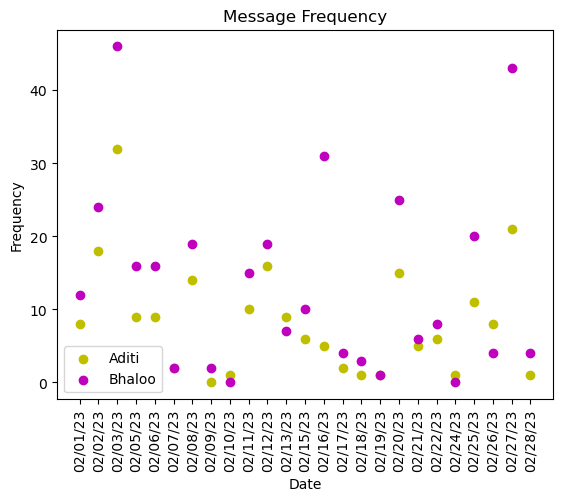

In [140]:
plt.scatter(All_Dates,Count_A,label='Aditi',color='y')
plt.scatter(All_Dates,Count_B,label='Bhaloo',color='m')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Message Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.show()

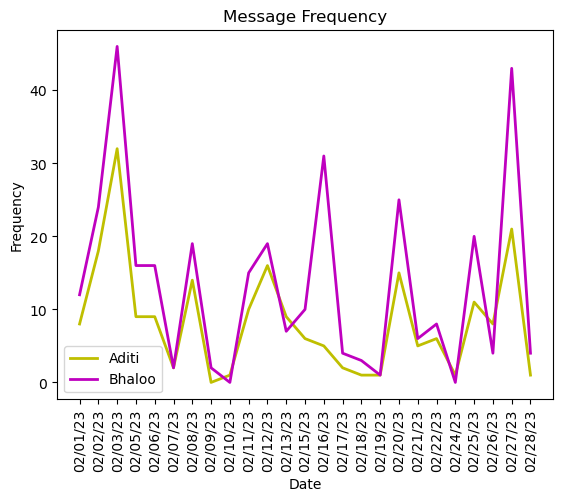

In [141]:
plt.plot(All_Dates,Count_A,label='Aditi',color='y',linewidth=2)
plt.plot(All_Dates,Count_B,label='Bhaloo',color='m',linewidth=2)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Message Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.show()

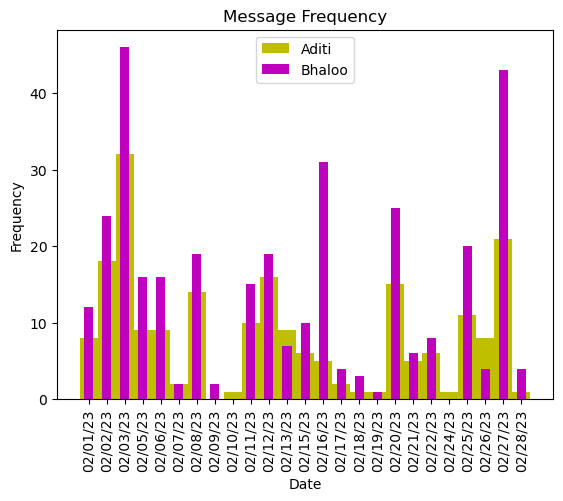

In [142]:
plt.bar(All_Dates,Count_A,label='Aditi', color='y',width=1)
plt.bar(All_Dates,Count_B,label='Bhaloo', color='m',width=.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Message Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.show()

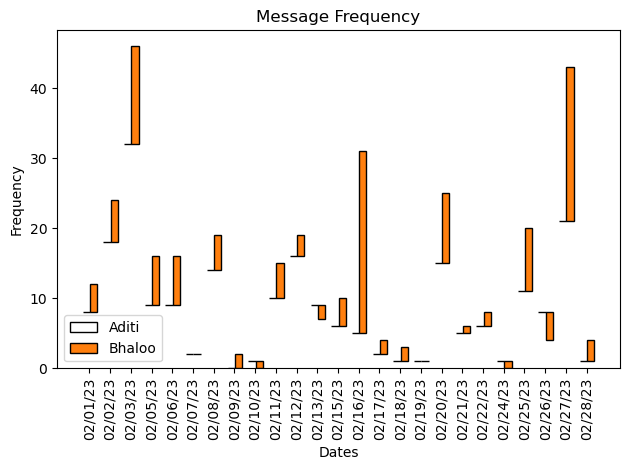

In [147]:
#The function hat_graph is defined in an example in the matplotlib documentation (https://matplotlib.org/stable/gallery/lines_bars_and_markers/hat_graph.html#sphx-glr-gallery-lines-bars-and-markers-hat-graph-py)

def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
#         for height, rect in zip(heights, rects):
#             ax.annotate(f'{height}',
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 4),  # 4 points vertical offset.
#                         textcoords='offset points',
#                         ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        #label_bars(heights, rects)


fig, ax = plt.subplots()

hat_graph(ax, All_Dates, [Count_A, Count_B], ['Aditi', 'Bhaloo'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Dates')
ax.set_ylabel('Frequency')

ax.set_title('Message Frequency')
ax.legend()
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()